# Keras Tutorial 
- See https://keras.io


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

## 1. Dataset

We will use a build-in data 'MNIST' which is a handwritten digit number image from 0 to 9

In [2]:
from keras.datasets import mnist

(train_imgages, train_labels), (test_imgages, test_labels) = mnist.load_data()

### Type of dataset

In [3]:
print('Feature type: %s'%type(train_imgages))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [4]:
print('Feature data type: %s'%train_imgages.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [5]:
print('Train_set Feature shape: %s'%str(train_imgages.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_imgages.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [6]:
print('Train_set Feature dimension: %s'%str(train_imgages.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_imgages.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data 

In [7]:
train_imgages[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

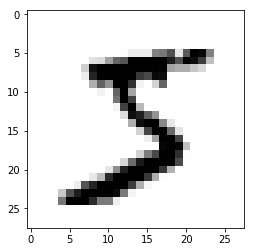

In [8]:
digit = train_imgages[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 2. Create a fully-connect neural network model

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Preprocessing Data

In [14]:
train_imgages = train_imgages.reshape(60000,28*28) # Reshape
train_imgages = train_imgages.astype('float32')/255 # Normalize

test_imgages = test_imgages.reshape(10000,28*28) # Reshape
test_imgages = test_imgages.astype('float32')/255 # Normalize

train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from keras.utils import to_categorical

In [16]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 4. Train Model

In [19]:
history = network.fit(train_imgages,train_labels,epochs=50,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 184s 3ms/step - loss: 0.2742 - acc: 0.9204 - val_loss: 0.1334 - val_acc: 0.9618
Epoch 2/50
54000/54000 [==============================] - 2s 37us/step - loss: 0.1134 - acc: 0.9667 - val_loss: 0.0830 - val_acc: 0.9752
Epoch 3/50
54000/54000 [==============================] - 2s 37us/step - loss: 0.0732 - acc: 0.9781 - val_loss: 0.0732 - val_acc: 0.9773
Epoch 4/50
54000/54000 [==============================] - 2s 35us/step - loss: 0.0532 - acc: 0.9839 - val_loss: 0.0654 - val_acc: 0.9805
Epoch 5/50
54000/54000 [==============================] - 2s 36us/step - loss: 0.0397 - acc: 0.9879 - val_loss: 0.0637 - val_acc: 0.9845
Epoch 6/50
54000/54000 [==============================] - 2s 35us/step - loss: 0.0300 - acc: 0.9913 - val_loss: 0.0654 - val_acc: 0.9822
Epoch 7/50
54000/54000 [==============================] - 2s 35us/step - loss: 0.0225 - acc: 0.9931 - val_loss: 0.0652 - val_acc

## 5. Evaluate Model

In [20]:
test_loss, test_acc = network.evaluate(test_imgages, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 0s 50us/step
Test Loss: 0.12820553920066083
Test Accuracy: 0.9838
